## 1. 데이터 불러오기
- 데이터 프레임 형태로 불러오기 

In [27]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np

# 데이터 불러오기
diabetes = load_diabetes()

# data를 df_X에 저장
df_X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# target을 df_y에 저장
df_y = pd.Series(diabetes.target, name='target')

### 1-1. 데이터셋 기본 정보 확인 (일부 확인) 

In [28]:
print("Data (df_X):")
print(df_X.head())
print("\nTarget (df_y):")
print(df_y.head())

Data (df_X):
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019908 -0.017646  
1 -0.039493 -0.068330 -0.092204  
2 -0.002592  0.002864 -0.025930  
3  0.034309  0.022692 -0.009362  
4 -0.002592 -0.031991 -0.046641  

Target (df_y):
0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64


### 1-2. 데이터셋 기본 정보 확인 (전체 확인)
- 데이터는 총 10개의 변수(Variables / Features)로 구성되어 있으며 1개의 target으로 구성
    - target은 당뇨병의 진행정도를 의미
    - 모든 데이터를 실수형이며, 결측이 없음


In [30]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


## 2. 데이터 시각화 및 탐색하기

### 2-1. 히스토그램
- 분포, 중심 경향, 퍼짐 정도, 이상치 파악

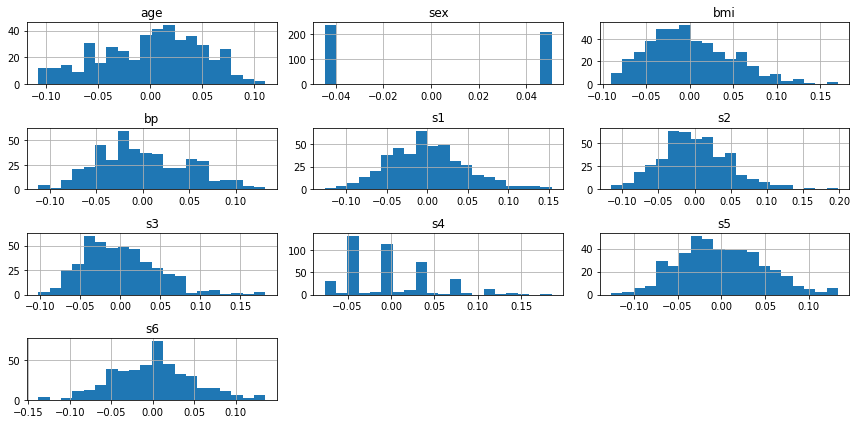

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
data=df_X
data.hist(bins=20, figsize=(12, 6))
plt.tight_layout()
plt.show()

- sex, s4, target 외에는 정규분포를 나타내고 있음

### 2-2. box plot
- 요약 통계, 이상치 탐지, 분포 비교, 변동 범위 파악


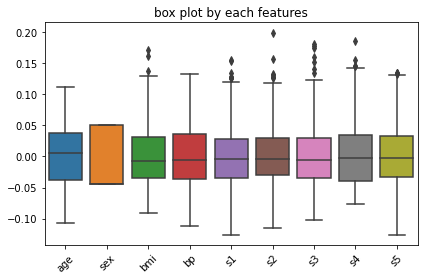

In [38]:
sns.boxplot(data=df_X.iloc[:, :-1], orient="v")
plt.title("box plot by each features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2-3. pair plot
- 상관관계 직관적으로 파악

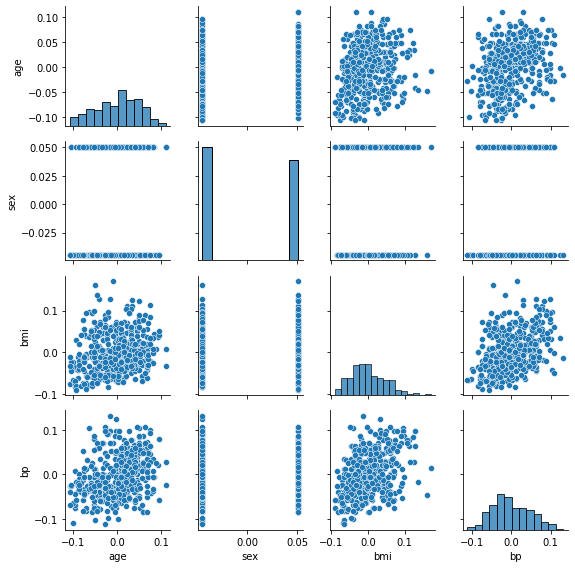

In [41]:
sns.pairplot(data=data.iloc[:, :4], height=2)
plt.tight_layout()
plt.show()

### 2-4. 특성간 feature 상관관계 파악
- 피어슨 상관계수 사용
- 변수 간 상관관계 파악, 중요한 변수 파악 등

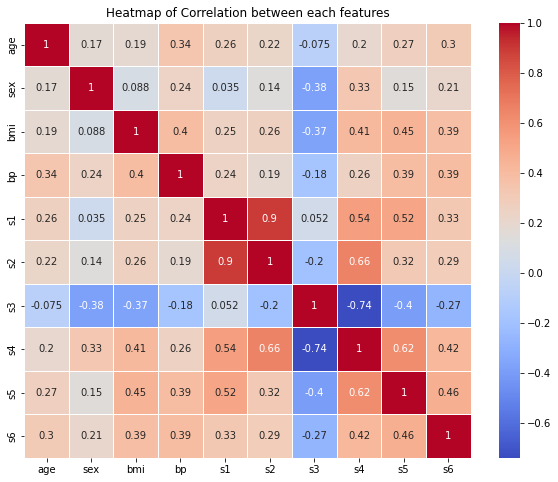

In [44]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap of Correlation between each features")
plt.show()

### 2-5. BMI, 당뇨 진행정도 산점도
- 변수 간 관계, 이상치 탐지, 변수 상관관계 파악

In [54]:
df = pd.concat([df_X, df_y], axis=1)

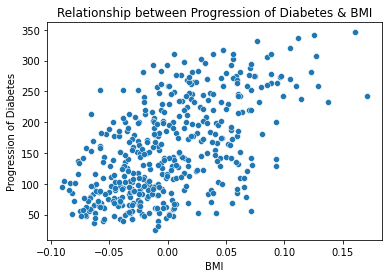

In [55]:
sns.scatterplot(x='bmi', y='target', data=df)
plt.xlabel("BMI")
plt.ylabel("Progression of Diabetes")
plt.title("Relationship between Progression of Diabetes & BMI")
plt.show()

## 3. 데이터 분할

### 3-1. 모델에 입력할 X 데이터 준비하기

In [58]:
X = df_X.to_numpy()

In [59]:
print("Numpy array (X):")
print(X[:5])

Numpy array (X):
[[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06832974 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567061 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286377 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665645  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02269202 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187235  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03199144 -0.04664087]]


### 3-2. 모델에 예측한 y 데이터 저장하기

In [60]:
y = df_y.to_numpy()

In [61]:
print("Numpy array (y):")
print(y[:5])

Numpy array (y):
[151.  75. 141. 206. 135.]


### 3-3. test 데이터 / train 데이터 분리하기

In [129]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

print("Train data (X_train):")
print(X_train[:5])
print("\nTest data (X_test):")
print(X_test[:5])
print("\nTrain target (y_train):")
print(y_train[:5])
print("\nTest target (y_test):")
print(y_test[:5])

## 4. 모델 학습 및 시각화하기

### 4-1. 모델 함수 정의

In [136]:
# 모델 함수 정의
def model(X, W, b):
    return np.dot(X, W) + b

### 4-2. 손실함수 정의 (MSE)

In [137]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

### 4-3. 기울기 함수 정의

In [139]:
def compute_gradients(X, y, y_pred):
    m = len(y)
    dW = (-2/m) * np.dot(X.T, (y - y_pred))
    db = (-2/m) * np.sum(y - y_pred)
    return dW, db

### 4-4. 모델 학습하기

In [145]:
# 학습률 설정
learning_rate = 0.01

# 모델 학습
num_epochs = 50000
for epoch in range(num_epochs):
    y_train_pred = model(X_train, W, b)
    dW, db = compute_gradients(X_train, y_train, y_train_pred)
    W -= learning_rate * dW
    b -= learning_rate * db
    if epoch % 1000 == 0:
        train_loss = mean_squared_error(y_train, y_train_pred)
        print(f"Epoch {epoch}, Train MSE: {train_loss}")

Epoch 0, Train MSE: 2970.7094074711513
Epoch 1000, Train MSE: 2970.1629059309466
Epoch 2000, Train MSE: 2969.6537174664004
Epoch 3000, Train MSE: 2969.1789523886723
Epoch 4000, Train MSE: 2968.735957138825
Epoch 5000, Train MSE: 2968.3222941233125
Epoch 6000, Train MSE: 2967.935723340646
Epoch 7000, Train MSE: 2967.5741856339046
Epoch 8000, Train MSE: 2967.235787419659
Epoch 9000, Train MSE: 2966.918786758137
Epoch 10000, Train MSE: 2966.621580642351
Epoch 11000, Train MSE: 2966.3426933954656
Epoch 12000, Train MSE: 2966.0807660761543
Epoch 13000, Train MSE: 2965.834546801094
Epoch 14000, Train MSE: 2965.60288190224
Epoch 15000, Train MSE: 2965.384707844217
Epoch 16000, Train MSE: 2965.1790438340645
Epoch 17000, Train MSE: 2964.984985061851
Epoch 18000, Train MSE: 2964.8016965163147
Epoch 19000, Train MSE: 2964.6284073248366
Epoch 20000, Train MSE: 2964.464405571641
Epoch 21000, Train MSE: 2964.309033552357
Epoch 22000, Train MSE: 2964.161683426829
Epoch 23000, Train MSE: 2964.02179323

In [146]:
# 최종 학습된 모델 평가
y_train_pred = model(X_train, W, b)
y_test_pred = model(X_test, W, b)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print(f"Final Train MSE: {mse_train}")
print(f"Final Test MSE: {mse_test}")
print(f"Final Test RMSE: {rmse_test}")

Final Train MSE: 2961.817584511983
Final Test MSE: 2587.9795022104645
Final Test RMSE: 50.8721879046937


### 4-4. 시각화

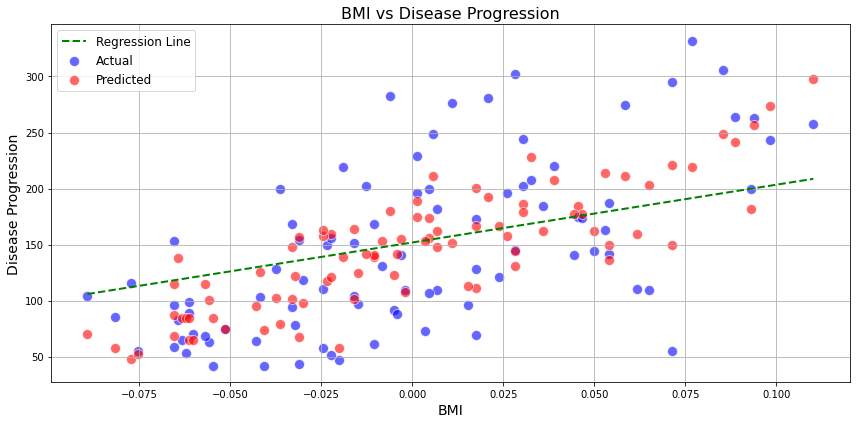

In [154]:
feature_index = df_X.columns.get_loc('bmi')

plt.figure(figsize=(12, 6))

plt.scatter(X_test[:, feature_index], y_test, color='blue', alpha=0.6, edgecolors='w', s=100, label='Actual')
plt.scatter(X_test[:, feature_index], y_test_pred, color='red', alpha=0.6, edgecolors='w', s=100, label='Predicted')

x_range = np.linspace(min(X_test[:, feature_index]), max(X_test[:, feature_index]), 100)
y_range_pred = W[feature_index] * x_range + b
plt.plot(x_range, y_range_pred, color='green', linewidth=2, linestyle='--', label='Regression Line')

plt.xlabel('BMI', fontsize=14)
plt.ylabel('Disease Progression', fontsize=14)
plt.title('BMI vs Disease Progression', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()

plt.show()